In [1]:
def filledMassive(count, modulo,):
    arr = []
    l=0
    while(l<count):
        arr.append(randint(0, modulo))
        l=l+1
    return arr

In [2]:
def f(z, a, b, s, alpha, beta):
    return z * a ** alpha[lift(z) % s] * b ** beta[lift(z) % s]

In [9]:

def Poland(a: Mod, b: Mod, p: Integer) -> Integer:
    s = 500
    opCount = 0
    if p < 500:
        s = p // 2
    m = p - 1
    k0 = Mod(ZZ.random_element(m, distribution='uniform'), m)
    y = z = (a ** k0) % p
    Ay = Az = Mod(k0, m)
    By = Bz = Mod(0, m)
    x = Mod(0, m)
    i = j = 0
    alphas = filledMassive(s, m)
    betas = filledMassive(s, m)

    isStart = True
    while isStart or z != y:

        opCount += 1
        isStart = False
        z = f(z, a, b, s, alphas, betas)
        i = lift(z) % s
        Az += alphas[i]
        Bz += betas[i]

        y = f(y, a, b, s, alphas, betas)
        i = lift(y) % s
        y = f(y, a, b, s, alphas, betas)
        j = lift(y) % s
        Ay += alphas[i] + alphas[j]
        By += betas[i] + betas[j]

    Adif = lift(Az - Ay)
    Bdif = lift(By - Bz)

    GCD = gcd(Bdif, m)
    if GCD > 1:
        if Adif % GCD != 0:
            x, opCount1 = Poland(a, b, p)
            return x, opCount + opCount1
        else:
            Adif = Adif // GCD
            Bdif = Bdif // GCD
            m = m // GCD

    Bdif = inverse_mod(Bdif, m)
    x = Mod(Adif * Bdif, m * GCD)
    x -= m
    for i in range(GCD):
        x += m
        if a ** x == b:
            return x, opCount
    x, opCount1 = Poland(a, b, p)
    return x, opCount + opCount1

In [10]:
sptime = []
spoperation = []
import time
xArr = []
lArr = []
for jj in range(30):
    print(jj)
    p = next_prime(2 ** jj)
    a = Mod(ZZ.random_element(p), p)
    b = a ** ZZ.random_element(p - 1)

    t1 = time.time()

    x, operationCount = Poland(a, b, p)

    t2 = time.time()
    sptime.append((t2 - t1))
    spoperation.append(operationCount)
    xArr.append(x)
    if b==1:
        lArr.append(-1)
    else:
        lArr.append(log(lift(b), lift(a)))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


[0, 0, 3, 2, 13, 1, 38, 18, 40, 379, 486, 984, 1719, 4536, 11078, 5310, 55902, 26514, 209946, 235375, 224457, 969463, 1764502, 1408026, 5319641, 18944214, 30208653, 48702001, 71346587, 161783465]
[-1, -1, log(2)/log(3), log(3)/log(6), log(3)/log(5), 1, 1/3*log(5)/log(2), 2*log(5)/log(75), log(68)/log(86), log(293)/log(26), log(207)/log(644), 2*log(10)/log(1703), log(1523)/log(697), log(57)/log(3577), log(12733)/log(5604), log(25135)/log(16130), log(28782)/log(58630), log(96536)/log(72757), log(52968)/log(120946), log(31271)/log(385617), log(474965)/log(596864), log(1498320)/log(658182), log(3102944)/log(379796), log(3692182)/log(2425852), log(13582093)/log(4963471), log(10178684)/log(712566), log(5966672)/log(3348978), log(77433739)/log(9458933), log(232637165)/log(206652866), log(28656772)/log(328018610)]


<function show at 0x7f64a551dd30>

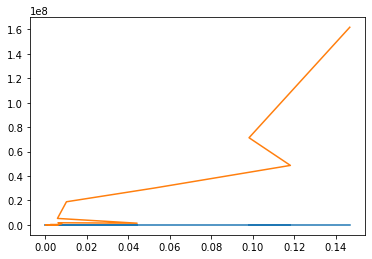

In [11]:
import matplotlib.pyplot as plt
import numpy as np
y2 = np.array(xArr)
y1 = np.array(lArr)
print(xArr)
print(lArr)
x=sptime
plt.plot(x, y1)
plt.plot(x, y2)
plt.show